In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import seaborn as sns
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [265]:
data=pd.read_csv('Data file.csv')
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [266]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [267]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

Checking for Nullvalues

In [269]:
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [270]:
print(data.shape) #shape of dataset

(209593, 36)


Data preprocessing

In [271]:
unique = data.nunique()
unique = unique[unique.values == 1]

In [272]:
data.drop(labels = list(unique.index), axis =1, inplace=True)
print(data.shape ,"rows,columns")

(209593, 35) rows,columns


In [273]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22-06-2016


In [274]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755200
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377700
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809400
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [275]:
data.describe(include=['object','datetime']).transpose()

,count,unique,top,freq
msisdn,209593,186243,04581I85330,7
pdate,209593,82,04-07-2016,3150


In [276]:
data1=data.copy()

In [277]:
data = data.drop_duplicates(subset = 'msisdn',keep='first')
data.shape

(186243, 35)

Data Exploration Process

In [278]:
for column in data.columns:
    if data[column].dtypes == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print('\n')

msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']


pdate : ['20-07-2016' '10-08-2016' '19-08-2016' '06-06-2016' '22-06-2016'
 '02-07-2016' '05-07-2016' '05-08-2016' '15-06-2016' '08-06-2016'
 '12-06-2016' '20-06-2016' '29-06-2016' '16-06-2016' '03-08-2016'
 '24-06-2016' '04-07-2016' '03-07-2016' '01-07-2016' '08-08-2016'
 '26-06-2016' '23-06-2016' '06-07-2016' '09-07-2016' '10-06-2016'
 '07-06-2016' '27-06-2016' '11-08-2016' '30-06-2016' '19-06-2016'
 '26-07-2016' '14-08-2016' '14-06-2016' '21-06-2016' '25-06-2016'
 '28-06-2016' '11-06-2016' '27-07-2016' '23-07-2016' '16-08-2016'
 '15-08-2016' '02-06-2016' '05-06-2016' '02-08-2016' '28-07-2016'
 '18-07-2016' '18-08-2016' '16-07-2016' '29-07-2016' '21-07-2016'
 '03-06-2016' '13-06-2016' '01-08-2016' '13-07-2016' '10-07-2016'
 '09-06-2016' '15-07-2016' '11-07-2016' '09-08-2016' '12-08-2016'
 '22-07-2016' '04-06-2016' '24-07-2016' '18-06-2016' '13-08-2016'
 '17-06-2016' '07-08-2016' '12-0

In [279]:
for column in data.columns:
    if data[column].dtype==np.number:
        print(str(column) + ' : ' + str(data[column].nunique()))
        print(data[column].nunique())

aon : 4282
4282
daily_decr30 : 129728
129728
daily_decr90 : 137129
137129
rental30 : 117221
117221
rental90 : 123991
123991
last_rech_date_ma : 1061
1061
last_rech_date_da : 1061
1061
fr_ma_rech30 : 961
961
sumamnt_ma_rech30 : 13130
13130
medianamnt_ma_rech30 : 501
501
medianmarechprebal30 : 22490
22490
medianamnt_ma_rech90 : 602
602
medianmarechprebal90 : 21514


<ipython-input-279-d1ebdccd3c3f>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:


21514
cnt_da_rech30 : 949
949
fr_da_rech30 : 960
960
maxamnt_loans30 : 924
924
medianamnt_loans30 : 6
6
cnt_loans90 : 968
968
medianamnt_loans90 : 6
6
payback30 : 1249
1249
payback90 : 2128
2128


In [280]:
data['label'].value_counts()

1    160383
0     25860
Name: label, dtype: int64

In [281]:
data['label'].value_counts(normalize=True) *100

1    86.114914
0    13.885086
Name: label, dtype: float64

Correlation:

In [282]:
correlation = data.corr()
correlation

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004035,0.174901,0.173016,0.057207,0.075869,0.004113,0.001814,0.139969,0.244728,...,0.197565,0.199916,-0.000274,0.050067,0.004305,0.205065,0.086033,0.041265,0.050892,0.053776
aon,-0.004035,1.000000,0.000630,0.000052,-0.002930,-0.002618,0.001853,-0.001796,0.004102,-0.004315,...,-0.003157,-0.003302,-0.003096,0.004679,0.000192,-0.003336,-0.000975,0.002346,0.002246,0.002549
daily_decr30,0.174901,0.000630,1.000000,0.977659,0.427503,0.444932,-0.000171,-0.001311,0.287181,0.444365,...,0.346504,0.454169,0.001569,-0.005629,0.008865,0.542179,0.396803,-0.031485,0.033669,0.056822
daily_decr90,0.173016,0.000052,0.977659,1.000000,0.420561,0.457443,0.000058,-0.001484,0.275195,0.419650,...,0.321006,0.430940,0.001283,0.000012,0.009220,0.544854,0.394487,-0.029046,0.025432,0.050147
rental30,0.057207,-0.002930,0.427503,0.420561,1.000000,0.955233,-0.000949,0.003294,0.128773,0.220472,...,0.162833,0.217586,-0.001525,-0.013746,0.003026,0.280233,0.225449,-0.032555,0.075530,0.099533
rental90,0.075869,-0.002618,0.444932,0.457443,0.955233,1.000000,-0.001758,0.002643,0.123436,0.218618,...,0.154900,0.216641,-0.002189,-0.006703,0.004301,0.307920,0.241772,-0.031045,0.069847,0.104731
last_rech_date_ma,0.004113,0.001853,-0.000171,0.000058,-0.000949,-0.001758,1.000000,0.002629,-0.000754,0.006491,...,0.002308,0.001031,0.001681,0.002430,-0.000216,0.000664,-0.003097,0.003261,-0.002857,-0.001787
last_rech_date_da,0.001814,-0.001796,-0.001311,-0.001484,0.003294,0.002643,0.002629,1.000000,-0.000699,0.002690,...,0.001722,0.001443,0.001135,0.000009,-0.002355,0.001179,0.002294,-0.002258,-0.000020,0.000699
last_rech_amt_ma,0.139969,0.004102,0.287181,0.275195,0.128773,0.123436,-0.000754,-0.000699,1.000000,0.008012,...,-0.019892,0.017706,0.000558,0.029945,0.000444,0.024067,0.148656,0.022939,-0.026037,-0.013236
cnt_ma_rech30,0.244728,-0.004315,0.444365,0.419650,0.220472,0.218618,0.006491,0.002690,0.008012,1.000000,...,0.733577,0.723759,-0.001186,-0.058580,0.012307,0.658939,0.180305,-0.063378,0.057166,0.031696


Heatmap

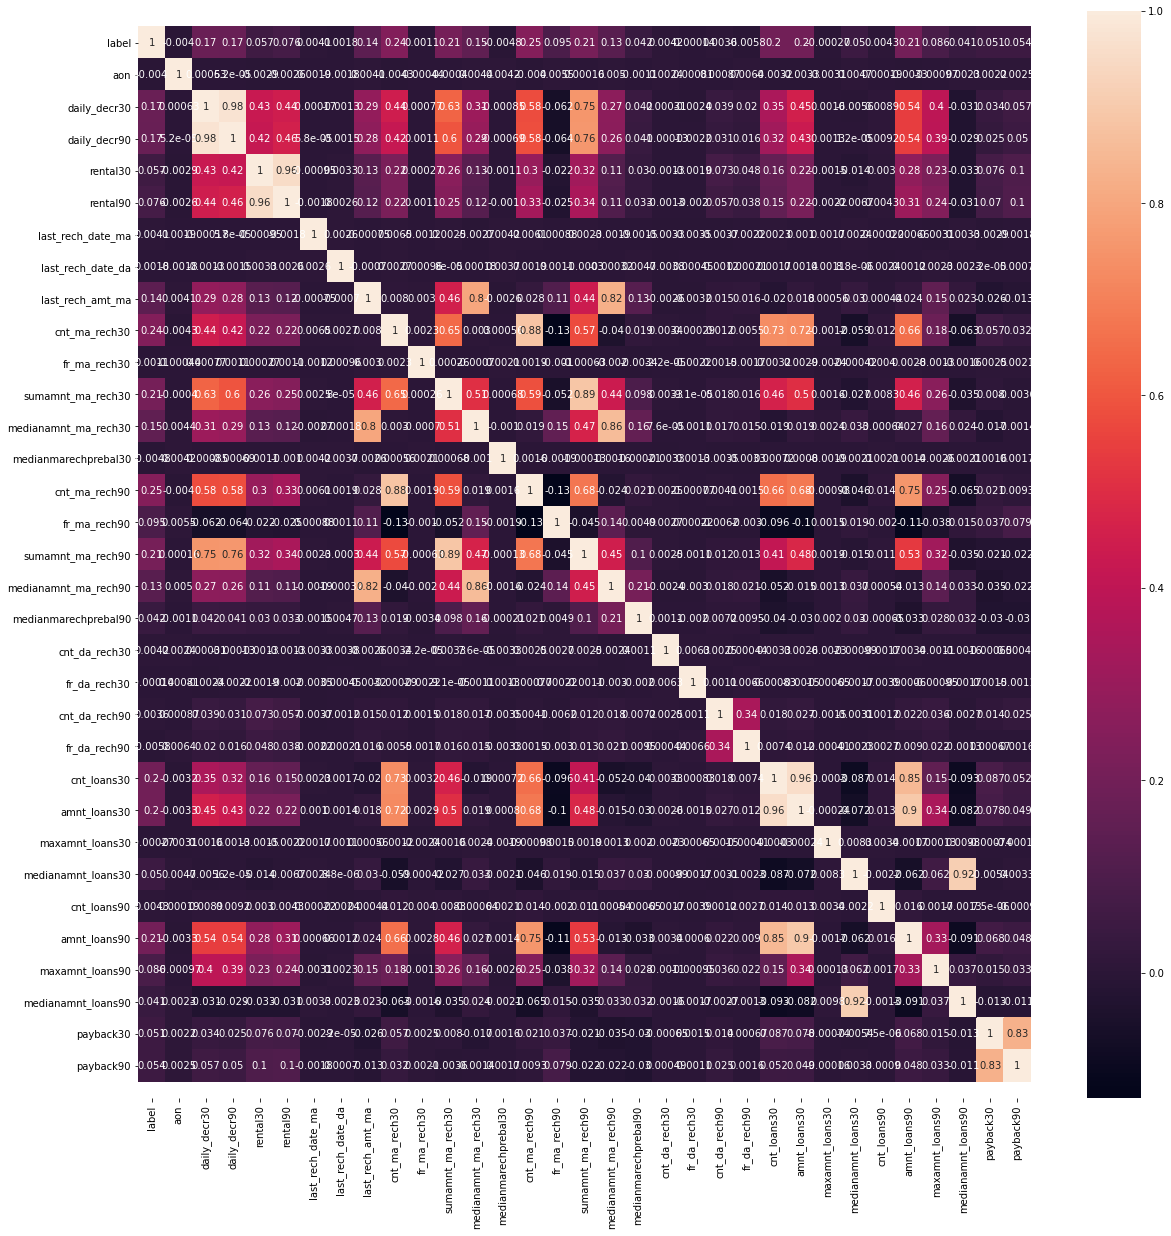

In [283]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), 
            xticklabels=data.corr().columns.values,
            yticklabels=data.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [284]:
data.drop(columns=['daily_decr30','rental30','amnt_loans30','medianamnt_loans30'],axis=1, inplace = True)

In [285]:
print(data.shape)

(186243, 31)


In [286]:
data['pdate'].nunique()

82

In [287]:
data['pDay']=pd.to_datetime(data['pdate'],format='%d-%m-%Y').dt.day

In [288]:
data['pMonth']=pd.to_datetime(data['pdate'],format='%d-%m-%Y').dt.month

In [289]:
data['pYear']=pd.to_datetime(data['pdate'],format='%d-%m-%Y').dt.year

In [290]:
data.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pDay,pMonth,pYear
0,0,21408I70789,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,...,2.0,12,6,0.0,29.000000,29.000000,20-07-2016,20,7,2016
1,1,76462I70374,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,1.0,12,12,0.0,0.000000,0.000000,10-08-2016,10,8,2016
2,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,1.0,6,6,0.0,0.000000,0.000000,19-08-2016,19,8,2016
3,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,06-06-2016,6,6,2016
4,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,7.0,42,6,0.0,2.333333,2.333333,22-06-2016,22,6,2016


In [291]:
data['pMonth'].unique()

array([7, 8, 6], dtype=int64)

In [292]:
data.drop(columns=['pdate'],axis=1, inplace = True)

In [293]:
cat_data,num_data=[],[]

for i in data.columns:
    if data[i].dtype==object:
        cat_data.append(i)
    elif (data[i].dtypes=='int64') | (data[i].dtypes=='float64') | (data[i].dtypes=='int32'):
        num_data.append(i)
    else: continue
        
print('Total Number of Features is', data.shape[1])
print('Number of Categorical features is', len(cat_data))
print('Number of Numerical feature is', len(num_data))

Total Number of Features is 33
Number of Categorical features is 1
Number of Numerical feature is 32


DATA VISUALIZATION

Text(0.5, 1.0, 'Correlation with target Variable that is label column')

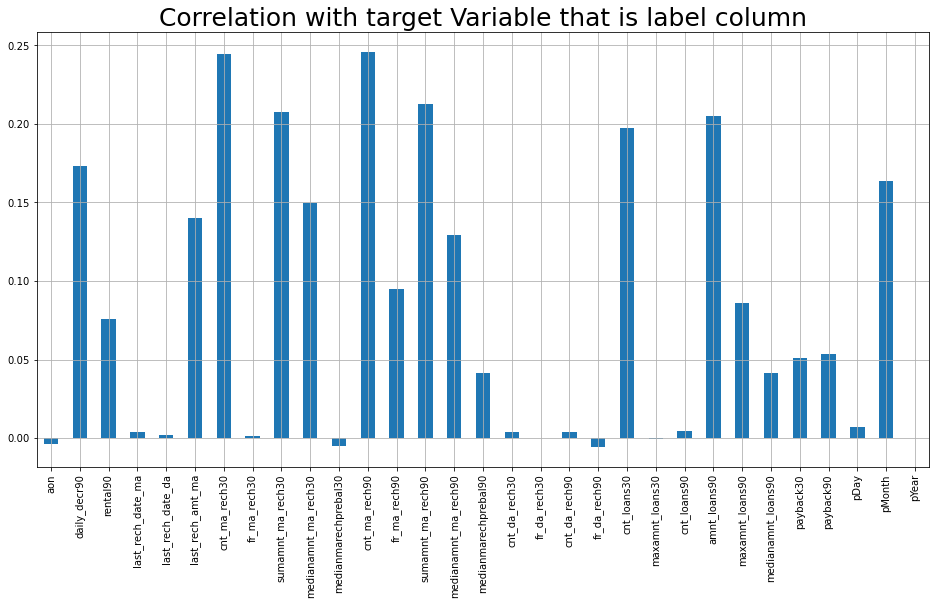

In [294]:
plt.figure(figsize=(16,8))
data.drop('label', axis=1).corrwith(data['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

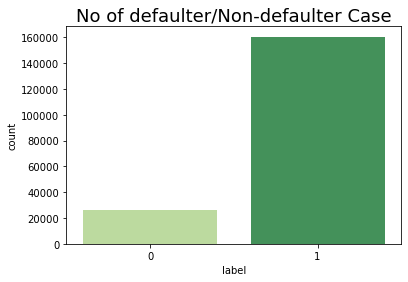

1    160383
0     25860
Name: label, dtype: int64


In [295]:
sns.countplot(x='label', data=data, palette='YlGn')
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(data['label'].value_counts())

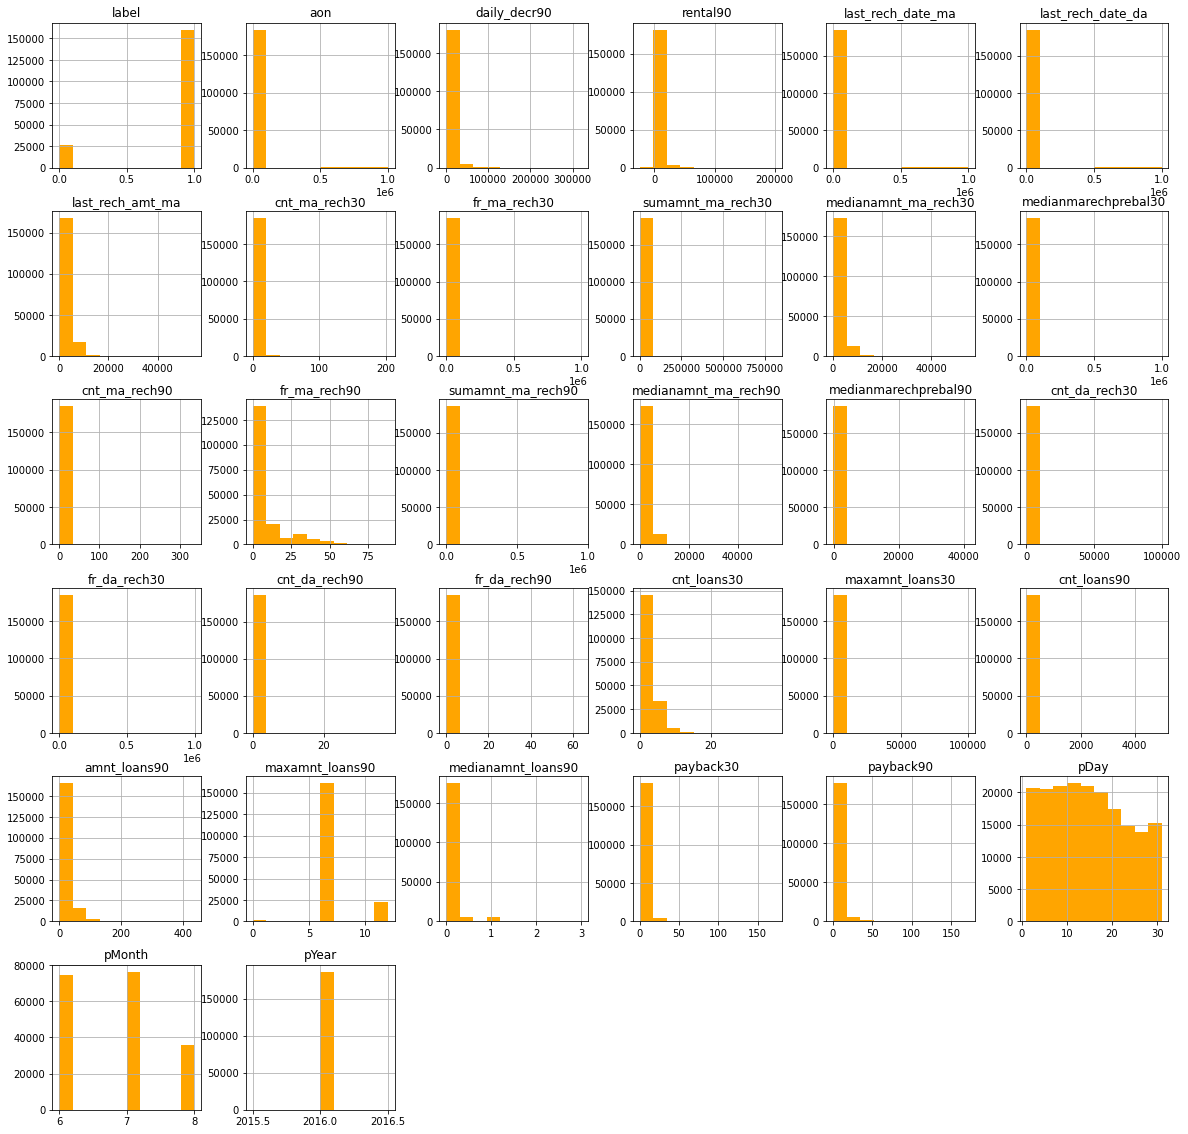

In [296]:
data.hist(figsize=(20,20),color='orange')
plt.show()

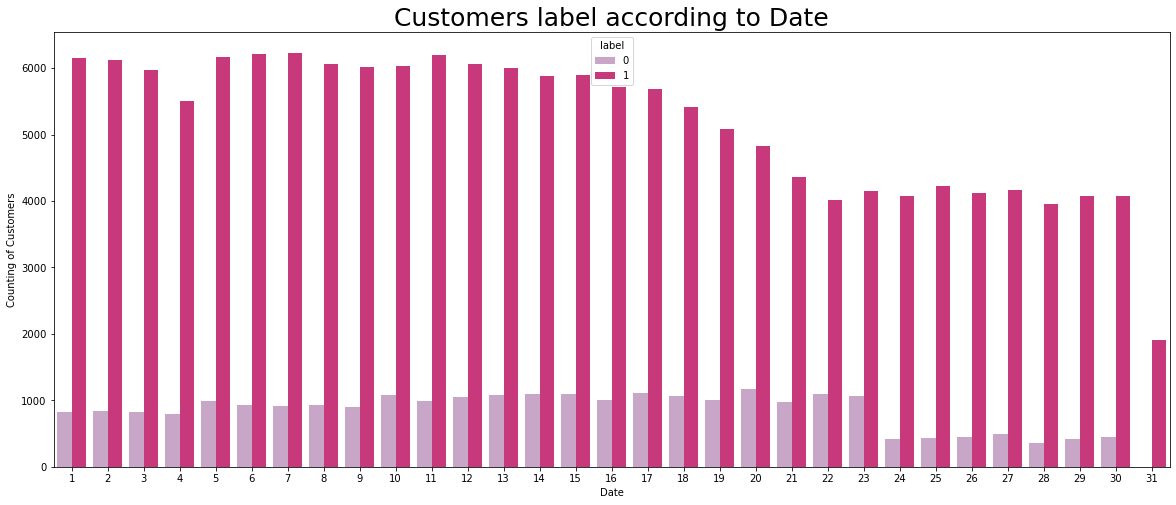

In [297]:
plt.figure(figsize=(20,8))
sns.countplot(x="pDay", hue='label', data=data, palette='PuRd')
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()

 here,customers who did not pay their loans are from date 10 to 23

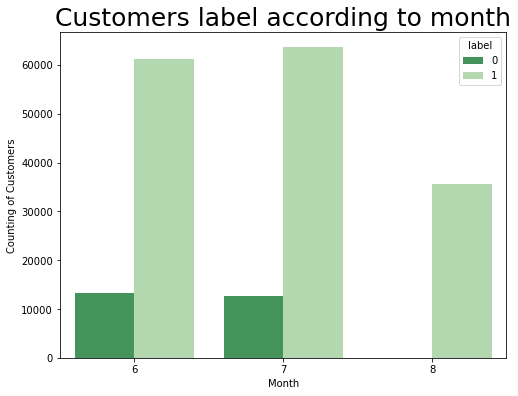

In [298]:
plt.figure(figsize=(8,6))
sns.countplot(x="pMonth", hue='label', data=data, palette='Greens_r')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()

Many loans have not paid by customers in June,July month.

SKEWNESS:

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


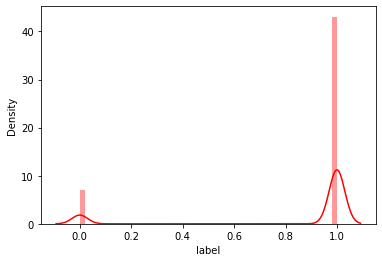

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


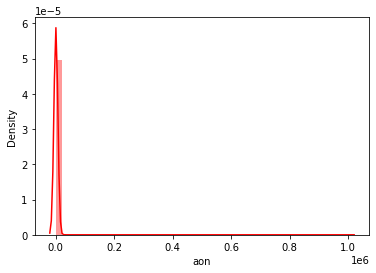

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


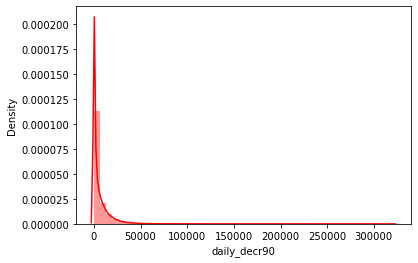

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


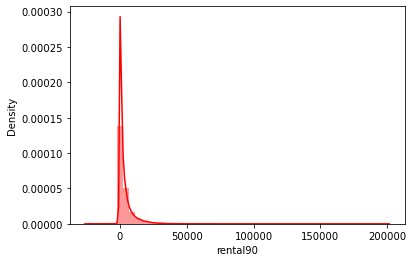

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


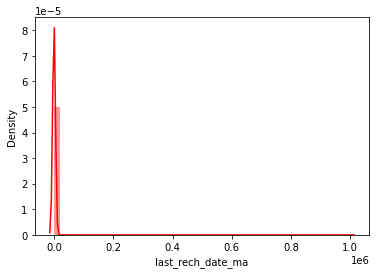

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


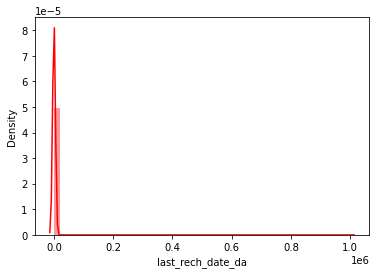

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


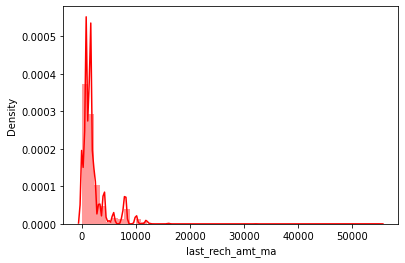

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


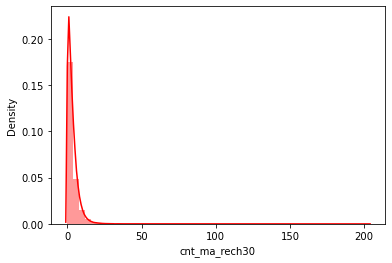

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


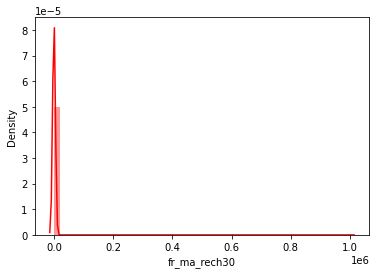

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


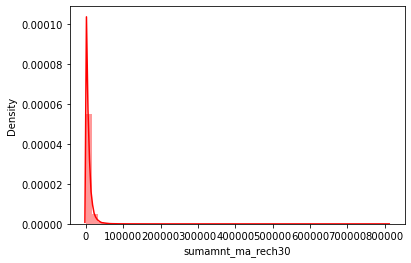

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


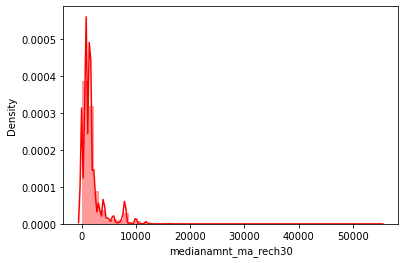

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


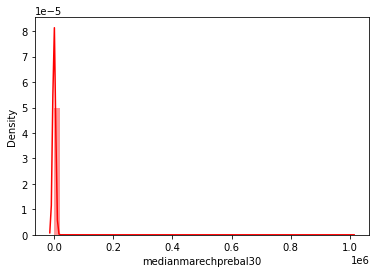

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


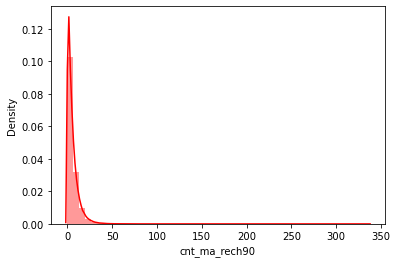

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


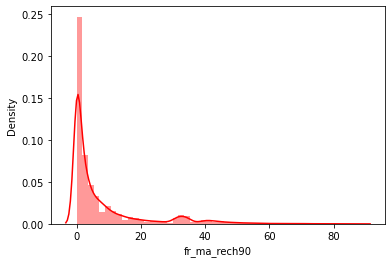

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


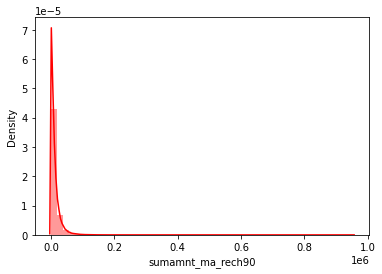

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


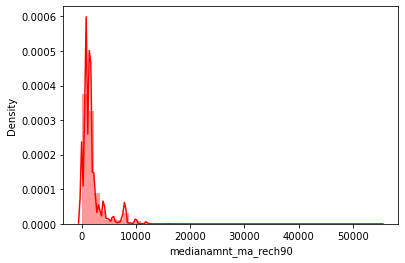

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


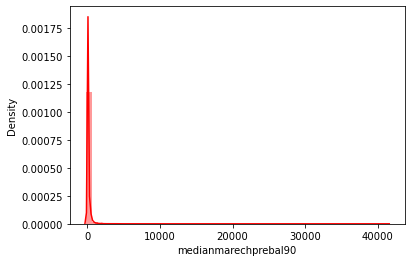

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


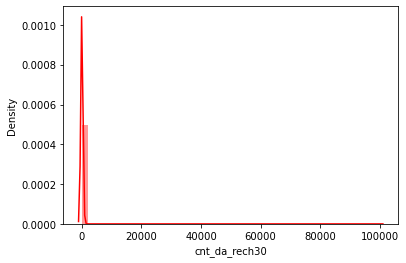

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


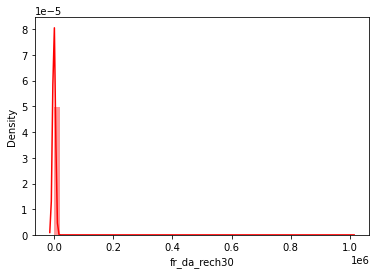

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


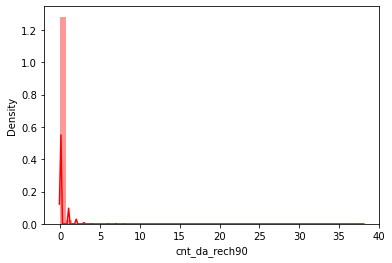

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


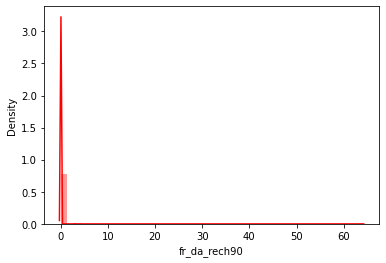

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


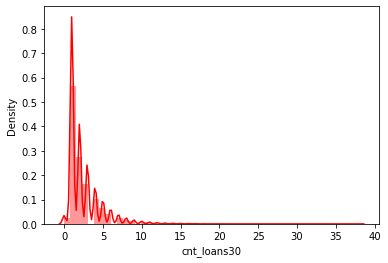

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


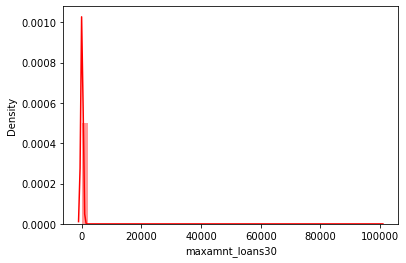

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


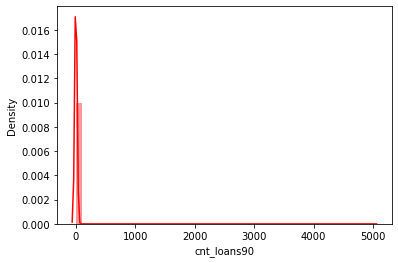

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


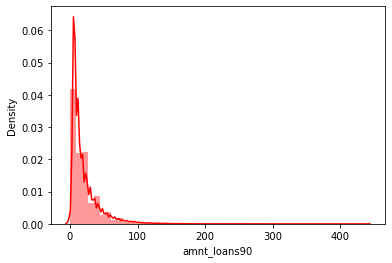

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


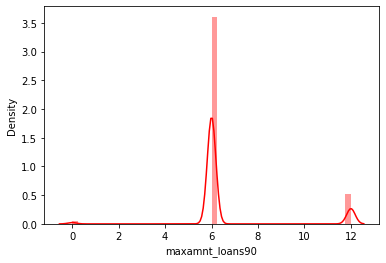

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


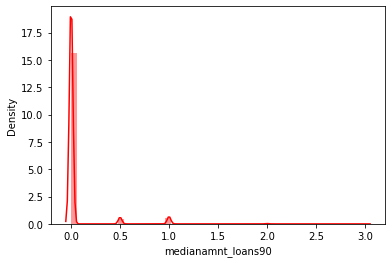

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


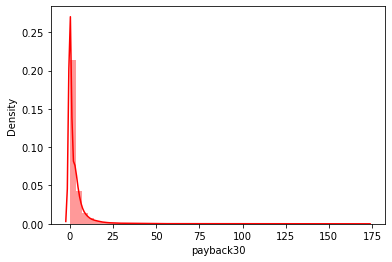

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


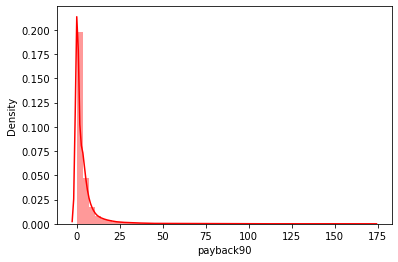

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


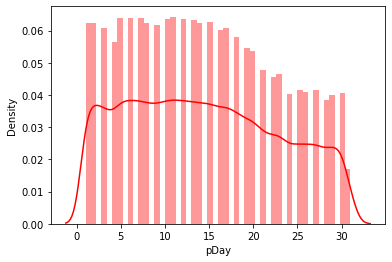

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


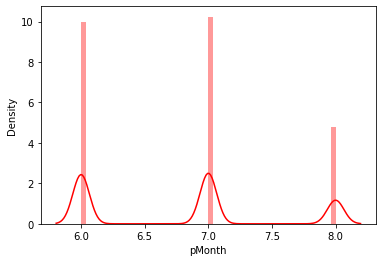

C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\IFATH FATIMA\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


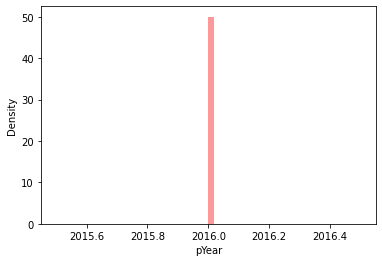

In [299]:
for col in data.describe().columns:
    sns.distplot(data[col],color='r')
    plt.show()

In [300]:
data.skew()

label                   -2.088847
aon                     10.365026
daily_decr90             4.301490
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
maxamnt_loans30         17.718074
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans90          1.650198
medianamnt_loans90       4.774958
payback30                8.193009
payback90                6.763241
pDay          

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

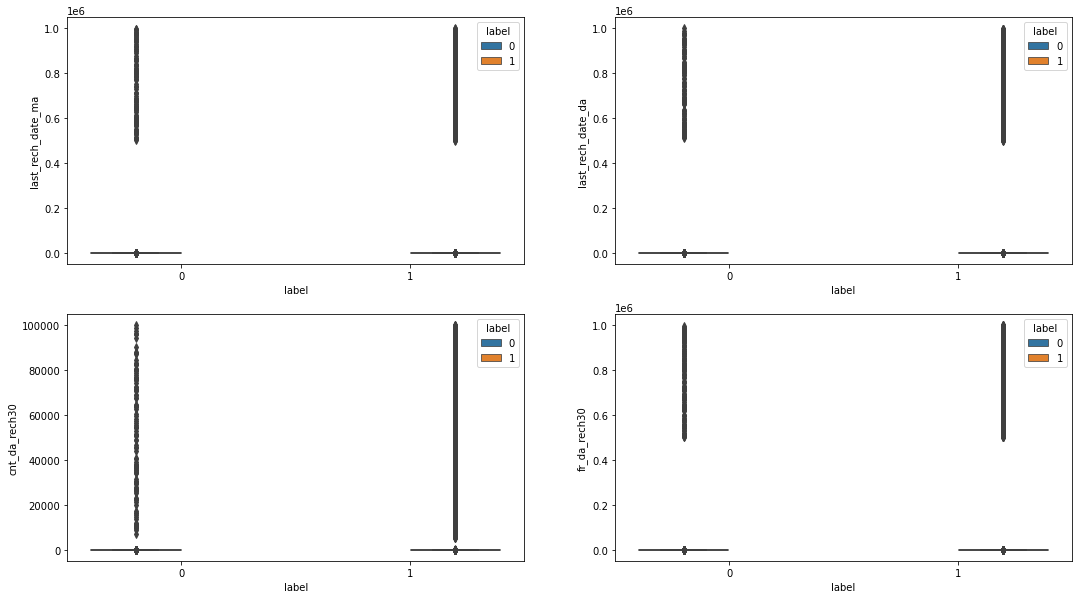

In [301]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'label', y = 'last_rech_date_ma', hue = 'label', data = data)
sns.boxplot(ax=ax2, x = 'label', y = 'last_rech_date_da', hue = 'label', data = data)
sns.boxplot(ax=ax3, x = 'label', y = 'cnt_da_rech30', hue = 'label', data = data)
sns.boxplot(ax=ax4, x = 'label', y = 'fr_da_rech30', hue = 'label', data = data)

There are too many outliers present in our dataset.So we need to remove it. But before removing please check that only 8 to 10% of data removed.


In [302]:
data2=data1.copy()

In [303]:
data1.drop(columns=['msisdn','pdate'],axis=1,inplace=True)

In [304]:
data1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [305]:
from scipy.stats import zscore
z=np.abs(zscore(data1))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [306]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [307]:
data1_new=data1[(z<3).all(axis=1)]

In [308]:
print(data1.shape)
print(data1_new.shape)

(209593, 33)
(161465, 33)


In [309]:
from sklearn.preprocessing import LabelEncoder

In [310]:
lable_encoding=LabelEncoder()

for column in data.columns:
    if data[column].dtype==np.number:
        continue
    data[column]=lable_encoding.fit_transform(data[column])

<ipython-input-310-8304b1f1f41b>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:


In [311]:
data.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pDay,pMonth,pYear
0,0,40191,272.0,3065.150000,260.13,2.0,0.0,14,2,21.0,...,6.0,2.0,2,1,0.0,29.000000,29.000000,19,1,0
1,1,142291,712.0,12124.750000,3691.26,20.0,0.0,38,1,0.0,...,12.0,1.0,2,2,0.0,0.000000,0.000000,9,2,0
2,1,33594,535.0,1398.000000,900.13,3.0,0.0,14,1,0.0,...,6.0,1.0,1,1,0.0,0.000000,0.000000,18,2,0
3,1,104157,241.0,21.228000,159.42,41.0,0.0,10,0,0.0,...,6.0,2.0,2,1,0.0,0.000000,0.000000,5,0,0
4,1,6910,947.0,150.619333,1098.90,4.0,0.0,23,7,2.0,...,6.0,7.0,7,1,0.0,2.333333,2.333333,21,0,0


Split data into x and y

In [312]:
x = data.drop(['label'], axis=1)

y = data['label']

In [313]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x, y)

DecisionTreeClassifier(max_depth=3)

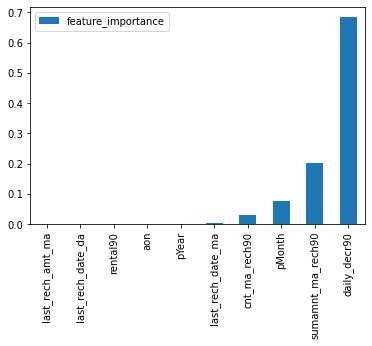

In [314]:
data_features = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['feature_importance'])
data_features.sort_values('feature_importance').tail(10).plot.bar()
plt.show()

By looking at the daily_decr90 which is Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah), it seems that this feature helps to discriminate the data indeed. This feature can bring insights for company when analyzing a customers.


Model building 

In [315]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
x=std_sc.fit_transform(x)

Splitting data

In [316]:
from sklearn.model_selection import train_test_split,cross_val_score

In [317]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [319]:
L_Reg=LogisticRegression()
D_Tree=DecisionTreeClassifier(random_state=20)
R_F_Cl=RandomForestClassifier()
KNN=KNeighborsClassifier(n_neighbors=10)
G_NB=GaussianNB()

In [320]:
models = []

In [321]:
models.append(('LogisticRegression', L_Reg))
models.append(('DecisionTreeClassifier',D_Tree))
models.append(('RandomForestClassifier', R_F_Cl))
models.append(('KNeighborsClassifier', KNN))
models.append(('GaussianNB', G_NB))

In [322]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [323]:
Model=[]
score=[]
cvs=[]
rocscore=[]

In [324]:
for name,model in models:
    print('Model:-',name,)
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.values.ravel())
    print(model)
    predict=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score = ', AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_Score = ', sc)
    cvs.append(sc*100)
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')


Model:- LogisticRegression


LogisticRegression()


Accuracy score =  0.6136272114687643


Cross_val_Score =  0.8642364984778247


[[ 4451   721]
 [13671 18406]]


roc_auc_score =  0.717201145874796


classification_report
               precision    recall  f1-score   support

           0       0.25      0.86      0.38      5172
           1       0.96      0.57      0.72     32077

    accuracy                           0.61     37249
   macro avg       0.60      0.72      0.55     37249
weighted avg       0.86      0.61      0.67     37249



Model:- DecisionTreeClassifier


DecisionTreeClassifier(random_state=20)


Accuracy score =  0.6136272114687643


Cross_val_Score =  0.8746583457298369


[[ 4451   721]
 [13671 18406]]


roc_auc_score =  0.717201145874796


classification_report
               precision    recall  f1-score   support

           0       0.25      0.86      0.38      5172
           1       0.96      0.57      0.72     32077

    accuracy                        

In [327]:
result=pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs, 'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,61.362721,86.423650,71.720115
1,DecisionTreeClassifier,61.362721,87.465835,71.720115
2,RandomForestClassifier,61.362721,91.326384,71.720115
3,KNeighborsClassifier,61.362721,87.139379,71.720115
4,GaussianNB,61.362721,60.837705,71.720115
